In [1]:
import pandas as pd
import numpy as np
import sqlalchemy as sqlA
import sqlite3
import os
import matplotlib.pyplot as plt

In [2]:
if os.path.exists('../DB_uni_large/uni_large.db'):
    os.remove('../DB_uni_large/uni_large.db')
# engine = sqlA.create_engine('sqlite:///DB_uni_large/uni_large.db')
conn = sqlite3.connect('../DB_uni_large/uni_large.db')
c = conn.cursor()
conn.commit()
conn

In [3]:
with conn as con:
    for inputfilename in ['../DB_uni_large/uni_definition.sql', '../DB_uni_large/uni_relation_large.sql']:
        with open(inputfilename) as file:
                instructions = file.read().replace('\n','').replace('\t',' ').split(';')
                print('Reading', inputfilename, 'Instructions:', len(instructions), flush=True)
                for i, instr in enumerate(instructions):
                    instr = instr+';'
                    con.execute(instr)

Reading ../DB_uni_large/uni_definition.sql Instructions: 12
Reading ../DB_uni_large/uni_relation_large.sql Instructions: 34632


In [4]:
with conn as con:
    out = con.execute("""
select distinct student.name, student.dept_name, course.dept_name
from student, takes, course 
where 
    student.ID = takes.ID and
    takes.course_id = course.course_id and
    course.dept_name = 'Comp. Sci.'
; """
                     )
    print((out.fetchall()))

[('Manber', 'Civil Eng.', 'Comp. Sci.'), ('Duan', 'Civil Eng.', 'Comp. Sci.'), ('Colin', 'Civil Eng.', 'Comp. Sci.'), ('Mediratta', 'Geology', 'Comp. Sci.'), ('Grosch', 'Astronomy', 'Comp. Sci.'), ('Kieras', 'Physics', 'Comp. Sci.'), ('Reed', 'English', 'Comp. Sci.'), ('Okaf', 'Geology', 'Comp. Sci.'), ('Zabary', 'Statistics', 'Comp. Sci.'), ('Shabuno', 'Math', 'Comp. Sci.'), ('Terauchi', 'Physics', 'Comp. Sci.'), ('Veselovsky', 'Elec. Eng.', 'Comp. Sci.'), ('Dhav', 'Biology', 'Comp. Sci.'), ('Xue', 'Languages', 'Comp. Sci.'), ('Roses', 'Accounting', 'Comp. Sci.'), ('Tzeng', 'Civil Eng.', 'Comp. Sci.'), ('Al-Tahat', 'English', 'Comp. Sci.'), ('Rokhs', 'Physics', 'Comp. Sci.'), ('Foels', 'Marketing', 'Comp. Sci.'), ('Jr', 'Accounting', 'Comp. Sci.'), ('Saito', 'Physics', 'Comp. Sci.'), ('Betho', 'Languages', 'Comp. Sci.'), ('Yamashita', 'Astronomy', 'Comp. Sci.'), ('Rakoj', 'Mech. Eng.', 'Comp. Sci.'), ('Kwan', 'Languages', 'Comp. Sci.'), ('Neff', 'Pol. Sci.', 'Comp. Sci.'), ('Juol', 'A

In [8]:
with conn as con:
    out = con.execute("""
; """
                     )
    print((out.fetchall()))

[]


In [9]:
with conn as con:
    out = con.execute("""
select title from course where course.dept_name = 'Comp. Sci.' and course.credits = 3
; """)
    for x in out.fetchall():
        print(x)

('International Finance',)
('Japanese',)
('Computability Theory',)


In [10]:
with conn as con:
    out = con.execute("""
select student.ID, student.name, teaches.course_id, instructor.name
from instructor, teaches, student, takes
where 
    student.ID = takes.ID and
    takes.course_id = teaches.course_id and
    instructor.ID = teaches.ID and
    instructor.name = 'Luo'
    
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['ID', 'name', 'course_id', 'name']
('10033', 'Zelty', '679', 'Luo')
('10454', 'Ugarte', '679', 'Luo')
('10527', 'Kieras', '679', 'Luo')
('107', 'Shabuno', '679', 'Luo')
('1087', 'Roses', '679', 'Luo')
('11095', 'Schultz', '679', 'Luo')
('11966', 'Kowe', '679', 'Luo')
('12078', 'Knutson', '679', 'Luo')
('12236', 'Bricker', '679', 'Luo')
('1232', 'Marcus', '679', 'Luo')
('13028', 'Okano', '679', 'Luo')
('13365', 'Wolter', '679', 'Luo')
('13506', 'Patrick', '679', 'Luo')
('1367', 'Ignj', '679', 'Luo')
('13757', 'Bedny', '679', 'Luo')
('14032', 'Belhadji', '679', 'Luo')
('14094', 'Miao', '679', 'Luo')
('14182', 'Moszkowski', '679', 'Luo')
('14284', 'Takeshi', '679', 'Luo')
('14874', 'Singhal', '679', 'Luo')
('15249', 'Cheah', '679', 'Luo')
('15340', 'Silbert', '679', 'Luo')
('15613', 'Umehara', '679', 'Luo')
('15726', 'Neuhold', '679', 'Luo')
('16035', 'Starker', '679', 'Luo')
('163', 'Bandekar', '679', 'Luo')
('16515', 'Suppan', '679', 'Luo')
('16528', 'Angs', '679', 'Luo')
('16885', 'Bi

In [11]:
with conn as con:
    out = con.execute("""
select max(salary)
from instructor
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['max(salary)']
(124651.41,)


In [12]:
with conn as con:
    out = con.execute("""
select *
from instructor, teaches
where
    instructor.ID = teaches.ID
    and salary = (select max(salary) from instructor)

; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

print()

with conn as con:
    out = con.execute("""
select *
from instructor, advisor, student
where instructor.ID = advisor.i_ID
and student.ID = advisor.s_ID
and salary = (select max(salary) from instructor)

; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['ID', 'name', 'dept_name', 'salary', 'ID', 'course_id', 'sec_id', 'semester', 'year']
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '19368', '545', '1', 'Fall', 2001)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '19368', '581', '1', 'Spring', 2005)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '19368', '591', '1', 'Spring', 2005)

['ID', 'name', 'dept_name', 'salary', 's_ID', 'i_ID', 'ID', 'name', 'dept_name', 'tot_cred']
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '24746', '19368', '24746', 'Schrefl', 'History', 4)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '39046', '19368', '39046', 'Narasimhamu', 'Math', 121)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '59046', '19368', '59046', 'Reichl', 'Elec. Eng.', 56)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '92040', '19368', '92040', 'Alexandri', 'Athletics', 66)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '10481', '19368', '10481', 'Grosch', 'Astronomy', 39)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '24387', '19368', '24387', 'Yap'

In [11]:
#  select instructor.name, count(*)
with conn as con:
    out = con.execute("""
select *
from instructor, advisor, student
where instructor.ID = advisor.i_ID
and student.ID = advisor.s_ID
group by instructor.ID
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['ID', 'name', 'dept_name', 'salary', 's_ID', 'i_ID', 'ID', 'name', 'dept_name', 'tot_cred']
('14365', 'Lembr', 'Accounting', 32241.56, '91569', '14365', '91569', 'Pavlovico', 'Marketing', 90)
('15347', 'Bawa', 'Athletics', 72140.88, '89106', '15347', '89106', 'Dawson', 'Mech. Eng.', 88)
('16807', 'Yazdi', 'Athletics', 98333.65, '32130', '16807', '32130', 'Bannac', 'Biology', 56)
('19368', 'Wieland', 'Pol. Sci.', 124651.41, '24746', '19368', '24746', 'Schrefl', 'History', 4)
('22591', 'DAgostino', 'Psychology', 59706.49, '76672', '22591', '76672', 'Miliko', 'Statistics', 116)
('25946', 'Liley', 'Languages', 90891.69, '92839', '25946', '92839', 'Cirsto', 'Math', 115)
('28097', 'Kean', 'English', 35023.18, '55859', '28097', '55859', 'Eguchi', 'Astronomy', 14)
('28400', 'Atanassov', 'Statistics', 84982.92, '2795', '28400', '2795', 'Milner', 'Finance', 8)
('31955', 'Moreira', 'Accounting', 71351.42, '44985', '31955', '44985', 'Prieto', 'Biology', 91)
('3199', 'Gustafsson', 'Elec. Eng.', 82

In [7]:
print()
with conn as con:
    out = con.execute("""
select avg(number_of_slave), min(number_of_slave), max(number_of_slave), count(number_of_slave), sum(number_of_slave)
from (
    select count(*) as number_of_slave
    from instructor, advisor, student
    where instructor.ID = advisor.i_ID
    and student.ID = advisor.s_ID
    group by instructor.ID
)
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)


['avg(number_of_slave)', 'min(number_of_slave)', 'max(number_of_slave)', 'count(number_of_slave)', 'sum(number_of_slave)']
(40.0, 24, 54, 50, 2000)


In [14]:
with conn as con:
    out = con.execute("""
select dept_name, avg(salary)
from instructor
group by dept_name
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['dept_name', 'avg(salary)']
('Accounting', 48716.5925)
('Astronomy', 79070.08)
('Athletics', 77098.198)
('Biology', 61287.25)
('Comp. Sci.', 98133.47)
('Cybernetics', 96346.5675)
('Elec. Eng.', 74162.73999999999)
('English', 72089.04999999999)
('Finance', 105311.38)
('Geology', 99382.59)
('Languages', 57421.85666666667)
('Marketing', 84097.4375)
('Mech. Eng.', 79813.02)
('Physics', 114576.9)
('Pol. Sci.', 100053.07333333332)
('Psychology', 61143.05)
('Statistics', 67795.44166666667)


In [15]:
with conn as con:
    out = con.execute("""
select * 
from instructor natural join teaches
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['ID', 'name', 'dept_name', 'salary', 'course_id', 'sec_id', 'semester', 'year']
('34175', 'Bondi', 'Comp. Sci.', 115469.11, '747', '1', 'Spring', 2004)
('3199', 'Gustafsson', 'Elec. Eng.', 82534.37, '169', '1', 'Spring', 2007)
('6569', 'Mingoz', 'Finance', 105311.38, '445', '1', 'Spring', 2001)
('28097', 'Kean', 'English', 35023.18, '808', '1', 'Fall', 2003)
('22591', 'DAgostino', 'Psychology', 59706.49, '962', '1', 'Spring', 2008)
('90376', 'Bietzk', 'Cybernetics', 117836.5, '158', '1', 'Fall', 2008)
('3199', 'Gustafsson', 'Elec. Eng.', 82534.37, '561', '1', 'Fall', 2006)
('34175', 'Bondi', 'Comp. Sci.', 115469.11, '274', '1', 'Fall', 2002)
('34175', 'Bondi', 'Comp. Sci.', 115469.11, '571', '1', 'Spring', 2004)
('79081', 'Ullman ', 'Accounting', 47307.1, '345', '1', 'Spring', 2008)
('80759', 'Queiroz', 'Biology', 45538.32, '559', '1', 'Fall', 2002)
('22591', 'DAgostino', 'Psychology', 59706.49, '991', '1', 'Spring', 2008)
('22591', 'DAgostino', 'Psychology', 59706.49, '400', '2', 'Fa

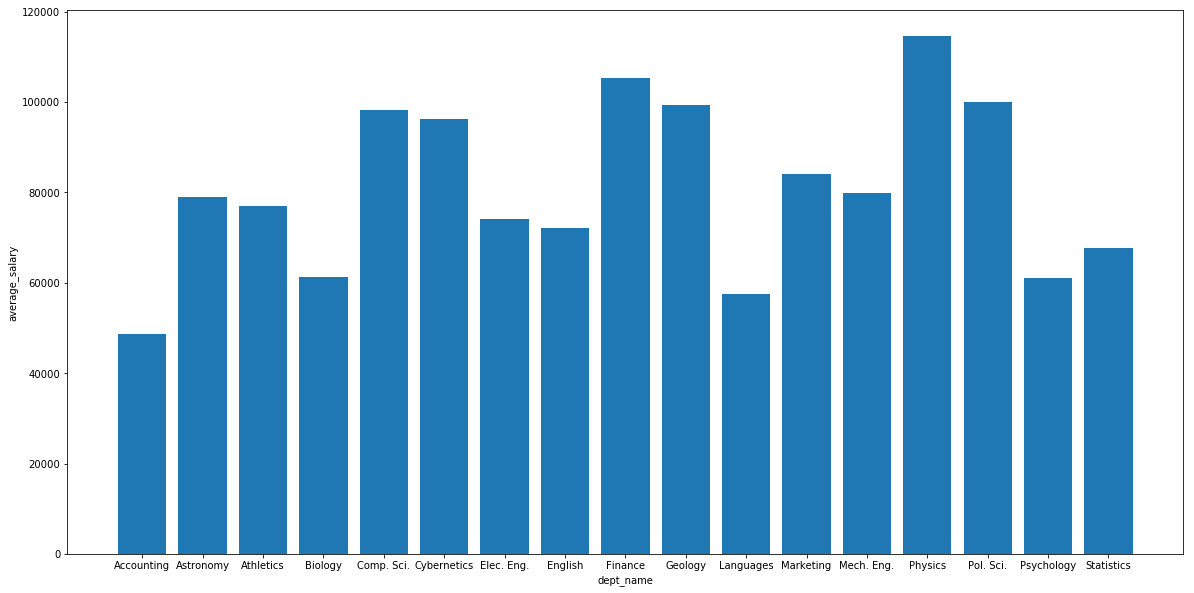

In [16]:
out = None
with conn as con:
    out = con.execute("""
select dept_name, avg(salary) as average_salary
from instructor
group by dept_name
; """)
label = [description[0] for description in out.description]
res = np.array(out.fetchall()).T

plt.figure(figsize=(20, 10))
plt.bar(res[0], [float(x) for x in res[1]])
plt.xlabel(label[0])
plt.ylabel(label[1])
plt.show()

In [22]:
with conn as con:
    out = con.execute("""
select instructor.name, avg(student.tot_cred) as ave_cred_slave
from instructor, advisor, student
where instructor.ID = advisor.i_ID
and student.ID = advisor.s_ID
group by instructor.ID
order by ave_cred_slave desc
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['name', 'ave_cred_slave']
('Pimenta', 76.07894736842105)
('Lembr', 75.56410256410257)
('Bawa', 74.44736842105263)
('Konstantinides', 73.96428571428571)
('Valtchev', 73.65)
('Mird', 73.44736842105263)
('DAgostino', 73.35)
('Yin', 71.83333333333333)
('Bietzk', 71.46153846153847)
('Pingr', 71.45454545454545)
('Gustafsson', 71.44736842105263)
('Bertolino', 71.1)
('Dusserre', 69.475)
('Yazdi', 69.29166666666667)
('Voronina', 68.90322580645162)
('Morris', 68.64285714285714)
('Bancilhon', 68.625)
('Liley', 68.3157894736842)
('Romero', 68.26470588235294)
('Moreira', 68.25714285714285)
('Arinb', 67.8780487804878)
('Sakurai', 67.63414634146342)
('Kean', 67.48648648648648)
('Vicentino', 67.34146341463415)
('Mingoz', 66.91304347826087)
('Ullman ', 66.725)
('Desyl', 66.29032258064517)
('Lent', 66.22222222222223)
('Sarkar', 65.85714285714286)
('Soisalon-Soininen', 64.81481481481481)
('Murata', 64.66666666666667)
('Jaekel', 64.36585365853658)
('Sullivan', 64.26086956521739)
('Atanassov', 64.09090909

In [8]:
with conn as con:
    out = con.execute("""
select * from student
; """)
    print([description[0] for description in out.description])
    for x in out.fetchall():
        print(x)

['ID', 'name', 'dept_name', 'tot_cred']
('24746', 'Schrefl', 'History', 4)
('79352', 'Rumat', 'Finance', 100)
('76672', 'Miliko', 'Statistics', 116)
('14182', 'Moszkowski', 'Civil Eng.', 73)
('44985', 'Prieto', 'Biology', 91)
('96052', 'Marcol', 'Cybernetics', 15)
('35175', 'Quimby', 'History', 4)
('44271', 'Sowerby', 'English', 108)
('40897', 'Coppens', 'Math', 58)
('92839', 'Cirsto', 'Math', 115)
('79329', 'Velikovs', 'Marketing', 110)
('97101', 'Marek', 'Psychology', 53)
('24865', 'Tran-', 'Marketing', 116)
('36052', 'Guerra', 'Elec. Eng.', 59)
('98940', 'Hawthorne', 'Marketing', 78)
('21395', 'Leuen', 'Math', 43)
('55859', 'Eguchi', 'Astronomy', 14)
('74016', 'Moei', 'Elec. Eng.', 15)
('93061', 'Alfaro', 'Elec. Eng.', 69)
('94998', 'Krishnakumar', 'Physics', 81)
('30772', 'Inoue', 'Math', 18)
('1968', 'Sahm', 'Finance', 4)
('90567', 'Tomason', 'Pol. Sci.', 118)
('49611', 'Karande', 'Astronomy', 57)
('81538', 'Wunderli', 'Languages', 117)
('68999', 'Greve', 'Psychology', 113)
('7463

('14874', 'Singhal', 'Comp. Sci.', 34)
('978', 'Salzman', 'Comp. Sci.', 127)
('33201', 'Macias', 'Civil Eng.', 61)
('30161', 'Grude', 'Cybernetics', 23)
('46441', 'Zander', 'Athletics', 18)
('31035', 'Arnoux', 'Civil Eng.', 92)
('67371', 'Garcia-Ferr', 'Geology', 70)
('80651', 'Holz', 'English', 108)
('43505', 'Yoon', 'Statistics', 118)
('35498', 'Lanfr', 'Accounting', 78)
('48423', 'Krone', 'Pol. Sci.', 80)
('51093', 'Syng', 'Psychology', 92)
('78572', 'Kurt', 'Comp. Sci.', 20)
('52669', 'Rayad', 'Physics', 114)
('87246', 'Dellwo', 'Comp. Sci.', 15)
('69122', 'Epstein', 'Biology', 128)
('52945', 'Adeni', 'Languages', 13)
('52471', 'Recc', 'Finance', 110)
('62728', 'Camme', 'Biology', 107)
('52929', 'Hashim', 'Math', 118)
('85754', 'Betho', 'Finance', 45)
('18583', 'Ma', 'Finance', 74)
('74974', 'Lao', 'Athletics', 86)
('48611', 'Suppan', 'Geology', 102)
('63582', 'Fischer', 'Pol. Sci.', 120)
('53118', 'Carvey', 'Comp. Sci.', 120)
('88887', 'Wodn', 'Languages', 122)
('81175', 'Zelek', 